In [1]:
import os
import pandas as pd
import pydicom

In [2]:
path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/SCCOR/CT_Exams/'
genPath = '/pylon5/ac5616p/debdas/SCCORProcessing/nifti/'

In [9]:
target_img_df = []
for patient in os.listdir(path):
    for appoint in os.listdir(os.path.join(path,patient)):
        max_file = 0
        maxSeries = ''
        for series in os.listdir(os.path.join(path,patient,appoint)):
            file_count = len(os.listdir(os.path.join(path,patient,appoint,series)))
            max_file = max(max_file, file_count)
            if file_count == max_file:
                maxSeries = series
        patient_info = patient+'#'+appoint+'#'+maxSeries
        imgPath = os.path.join(genPath,patient,appoint,maxSeries)
        nii_input_file = imgPath+'/'+maxSeries+'_Iso1.0mm.nii.gz'
        sv_input_file = imgPath+'/'+maxSeries+'_Iso1.0mm_SuperVoxel_Param30mm.nii.gz'
        hdf5_file1 = imgPath+'/'+maxSeries+'_Iso1.0mm_SuperVoxel_Param30mm_fHOG_Hist_Features.h5'
        hdf5_file2 = imgPath+'/'+maxSeries+'_Iso1.0mm_SuperVoxel_Param30mm_haralick.h5'
        if os.path.exists(nii_input_file) and os.path.exists(sv_input_file) and os.path.exists(hdf5_file1) and os.path.exists(hdf5_file2):
            target_img_df.append((patient_info,nii_input_file,sv_input_file,hdf5_file1,hdf5_file2))
            

In [13]:
len(target_img_df)

1406

In [12]:
SCCOR_batch_df = pd.DataFrame(target_img_df)
SCCOR_batch_df.to_csv('/pylon5/ac5616p/debdas/SCCORProcessing/SCCOR_FeatureSource.csv', index=False, header=False)

In [3]:
feature_data_path = '/pylon5/ac5616p/debdas/SCCORProcessing/tmp/kl_div_3nn_mat.h5'

In [4]:
features_df = pd.HDFStore(feature_data_path,mode='r') #h5py.File(feature_data_path, 'r')
feature_keys = list(features_df.keys())

In [5]:
feature_keys

['/kl_/pylon5/ac5616p/debdas/SCCORProcessing/features_db']

In [6]:
div_matrix = features_df.get('/kl_/pylon5/ac5616p/debdas/SCCORProcessing/features_db').to_numpy()

In [7]:
div_matrix.shape

(1418, 1418)

In [21]:
import numpy as np
np.random.seed(0)
import seaborn as sns
sns.set()

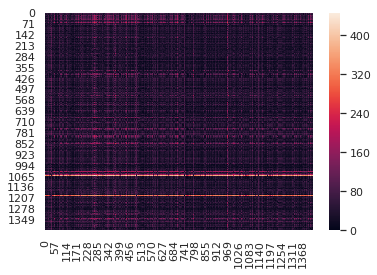

In [22]:
ax = sns.heatmap(div_matrix)